In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_dataset.csv')
df.shape

(26996, 28)

In [3]:
users = df['user']
df = df.drop(columns=['user'])

In [4]:
df.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [5]:
df.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


### ONE HOT ENCODING ###

In [6]:
df = pd.get_dummies(df)

In [7]:
df.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [8]:
df = df.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

### SPLITTING DATASET ###

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['churn']),df['churn'],test_size=0.2,random_state=32)

### BALANCING DATASET ###

In [10]:
y_train.value_counts()

0    12672
1     8924
Name: churn, dtype: int64

In [11]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [12]:
len(pos_index),len(neg_index)

(8924, 12672)

In [13]:
pos_index

Int64Index([ 5685,  7791,  7929, 15182,  3354,   111,  7876,  8286,  4236,
            26205,
            ...
             9475, 14801,  5124,  8201, 25834, 13285, 20227,  6745, 20414,
            10967],
           dtype='int64', length=8924)

In [14]:
random.seed(0)
neg_index = np.random.choice(neg_index,len(pos_index))
pos_index = np.asarray(pos_index)
indeces = np.concatenate((neg_index,pos_index))

In [15]:
x_train = x_train.loc[indeces,]
y_train = y_train[indeces]

### FEATURE SCALING ###

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = pd.DataFrame(sc.fit_transform(x_train))
x_test2 = pd.DataFrame(sc.transform(x_test))
x_train = x_train2
x_test = x_test2

### MODEL BUILDING ###

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred)) # tp / (tp + fp)
print(recall_score(y_test, y_pred)) # tp / (tp + fn)
print(f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.6205555555555555
0.5312014902204284
0.7604444444444445
0.6254798025955035
[[1640 1510]
 [ 539 1711]]


Test Data Accuracy: 0.6206


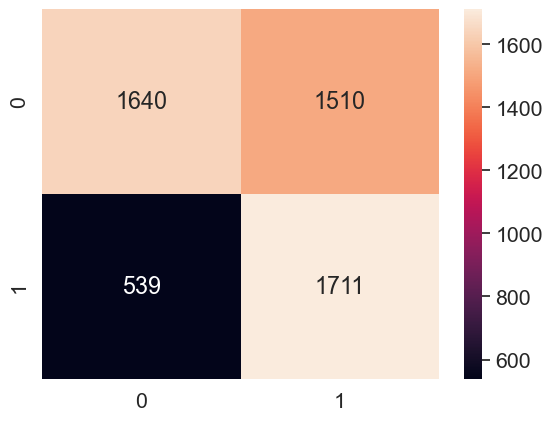

In [32]:
sns.heatmap(cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))